# Robustness Analysis: Adjoint and Toggle-Frame Objectives Subject to Either Multiplicative or Additive Errors

This notebook compares the performance of the adjoint and toggling-frame robustness objectives for multiplicative and additive error terms in the system's Hamiltonian. 

## Imports

In [19]:
import Pkg; Pkg.activate(@__DIR__); Pkg.instantiate();
# Pkg.develop(path="../../QuantumCollocation.jl")
using PiccoloQuantumObjects
using QuantumCollocation
using ForwardDiff
using LinearAlgebra
using Plots
using SparseArrays
using Statistics
using CairoMakie
using Random
using NamedTrajectories
using TrajectoryIndexingUtils


In [92]:
# Problem parameters
T = 50
Δt = 0.2
U_goal = GATES.H
H_drive = [PAULIS.X, PAULIS.Y, PAULIS.Z]
piccolo_opts = PiccoloOptions(verbose=false)
pretty_print(X::AbstractMatrix) = Base.show(stdout, "text/plain", X);
sys = QuantumSystem(H_drive)

QuantumSystem: levels = 2, n_drives = 3

sanity checks for our good ole adjoint

In [93]:
propertynames(sys)

(:H, :G, :n_drives, :levels, :params)

In [94]:
typeof(sys.H)

PiccoloQuantumObjects.QuantumSystems.var"#6#15"{SparseMatrixCSC{ComplexF64, Int64}, Vector{SparseMatrixCSC{ComplexF64, Int64}}}

In [95]:
length(sys.H.H_drives)
X_drive = sys.H.H_drives[1]
X_drive === H_drive[1]
def = UnitarySmoothPulseProblem(sys, U_goal, T, Δt; Q_t=1.0)


    constructing UnitarySmoothPulseProblem...
	using integrator: DataType
	control derivative names: [:da, :dda]
	applying timesteps_all_equal constraint: Δt


DirectTrajOptProblem
   timesteps            = 50
   duration             = 9.799999999999997
   variable names       = (:Ũ⃗, :a, :da, :dda, :Δt)
   knot point dimension = 18


In [ ]:
a_indices  = [collect(slice(k, def.trajectory.components.a, def.trajectory.dim)) for k in 1:T]

In [ ]:
Random.seed!(5)


#Adjoint
∂ₑHₐ = PAULIS.X
varsys_add = VariationalQuantumSystem(
    H_drive,
    [PAULIS.X, PAULIS.Y, PAULIS.Z]
)



ftog_prob = UnitaryToggleProblem(
    varsys_add, U_goal, T, Δt;
                    a_bound=5.0,
                    dda_bound=4.0,
                    Δt_max=Δt,
                    Δt_min=Δt,
                    piccolo_options=piccolo_opts,
                    Q_t=1.0
                )
#solve!(ftog_prob, max_iter=75, print_level=5)
solve!(ftog_prob, max_iter=2000, print_level=1, options=IpoptOptions(eval_hessian=false))

tog_prob = UnitaryToggleProblem(
    varsys_add, U_goal, T, Δt;
                    a_bound=5.0,
                    dda_bound=4.0,
                    Δt_max=Δt,
                    Δt_min=Δt,
                    piccolo_options=piccolo_opts,
                    fast=false,
                    Q_t=1.0
                )
#solve!(tog_prob, max_iter=75, print_level=5)
solve!(tog_prob, max_iter=2000, print_level=1, options=IpoptOptions(eval_hessian=false))

var_prob = UnitaryVariationalProblem(
        varsys_add, U_goal, T, Δt;
        robust_times=[[T], [T], [T]],
        a_bound=5.0,
        dda_bound = 4.0,
        Δt_max=Δt,
        Δt_min=Δt,
        piccolo_options=piccolo_opts
    )
#solve!(var_prob, max_iter=120, print_level=5)
solve!(var_prob, max_iter=2000, print_level=1, options=IpoptOptions(eval_hessian=false))

#Default
def = UnitarySmoothPulseProblem(sys, U_goal, T, Δt; Q_t=1.0)
solve!(def, max_iter=2000, print_level=1, options=IpoptOptions(eval_hessian=false))
#solve!(def, max_iter=150, print_level=5)


    initializing optimizer...
        applying constraint: initial value of Ũ⃗
        applying constraint: initial value of a
        applying constraint: final value of a
        applying constraint: bounds on a
        applying constraint: bounds on da
        applying constraint: bounds on dda
        applying constraint: bounds on Δt


In [69]:
solve!(ftog_prob, max_iter=75, print_level=5)

    initializing optimizer...
        applying constraint: initial value of Ũ⃗
        applying constraint: initial value of a
        applying constraint: final value of a
        applying constraint: bounds on a
        applying constraint: bounds on da
        applying constraint: bounds on dda
        applying constraint: bounds on Δt
This is Ipopt version 3.14.19, running with linear solver MUMPS 5.8.1.

Number of nonzeros in equality constraint Jacobian...:     1906
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:    34829

Total number of variables............................:      411
                     variables with only lower bounds:        0
                variables with lower and upper bounds:      144
                     variables with only upper bounds:        0
Total number of equality constraints.................:      336
Total number of inequality constraints...............:        0
        in

In [85]:
# solve!(ftog_prob, max_iter=75, print_level=5)
solve!(tog_prob, max_iter=150, print_level=5)

    initializing optimizer...
        applying constraint: initial value of Ũ⃗
        applying constraint: initial value of a
        applying constraint: final value of a
        applying constraint: bounds on a
        applying constraint: bounds on da
        applying constraint: bounds on dda
        applying constraint: bounds on Δt
This is Ipopt version 3.14.19, running with linear solver MUMPS 5.8.1.

Number of nonzeros in equality constraint Jacobian...:     1906
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:    34829

Total number of variables............................:      411
                     variables with only lower bounds:        0
                variables with lower and upper bounds:      144
                     variables with only upper bounds:        0
Total number of equality constraints.................:      336
Total number of inequality constraints...............:        0
        in

In [44]:
solve!(var_prob, max_iter=30, print_level=5)

    initializing optimizer...
        applying constraint: timesteps all equal constraint
        applying constraint: initial value of Ũ⃗
        applying constraint: initial value of a
        applying constraint: initial value of Ũ⃗ᵥ1
        applying constraint: initial value of Ũ⃗ᵥ2
        applying constraint: initial value of Ũ⃗ᵥ3
        applying constraint: final value of a
        applying constraint: bounds on a
        applying constraint: bounds on da
        applying constraint: bounds on dda
        applying constraint: bounds on Δt
This is Ipopt version 3.14.19, running with linear solver MUMPS 5.8.1.

Number of nonzeros in equality constraint Jacobian...:     8554
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:     1165

Total number of variables............................:      987
                     variables with only lower bounds:        0
                variables with lower and upper bounds

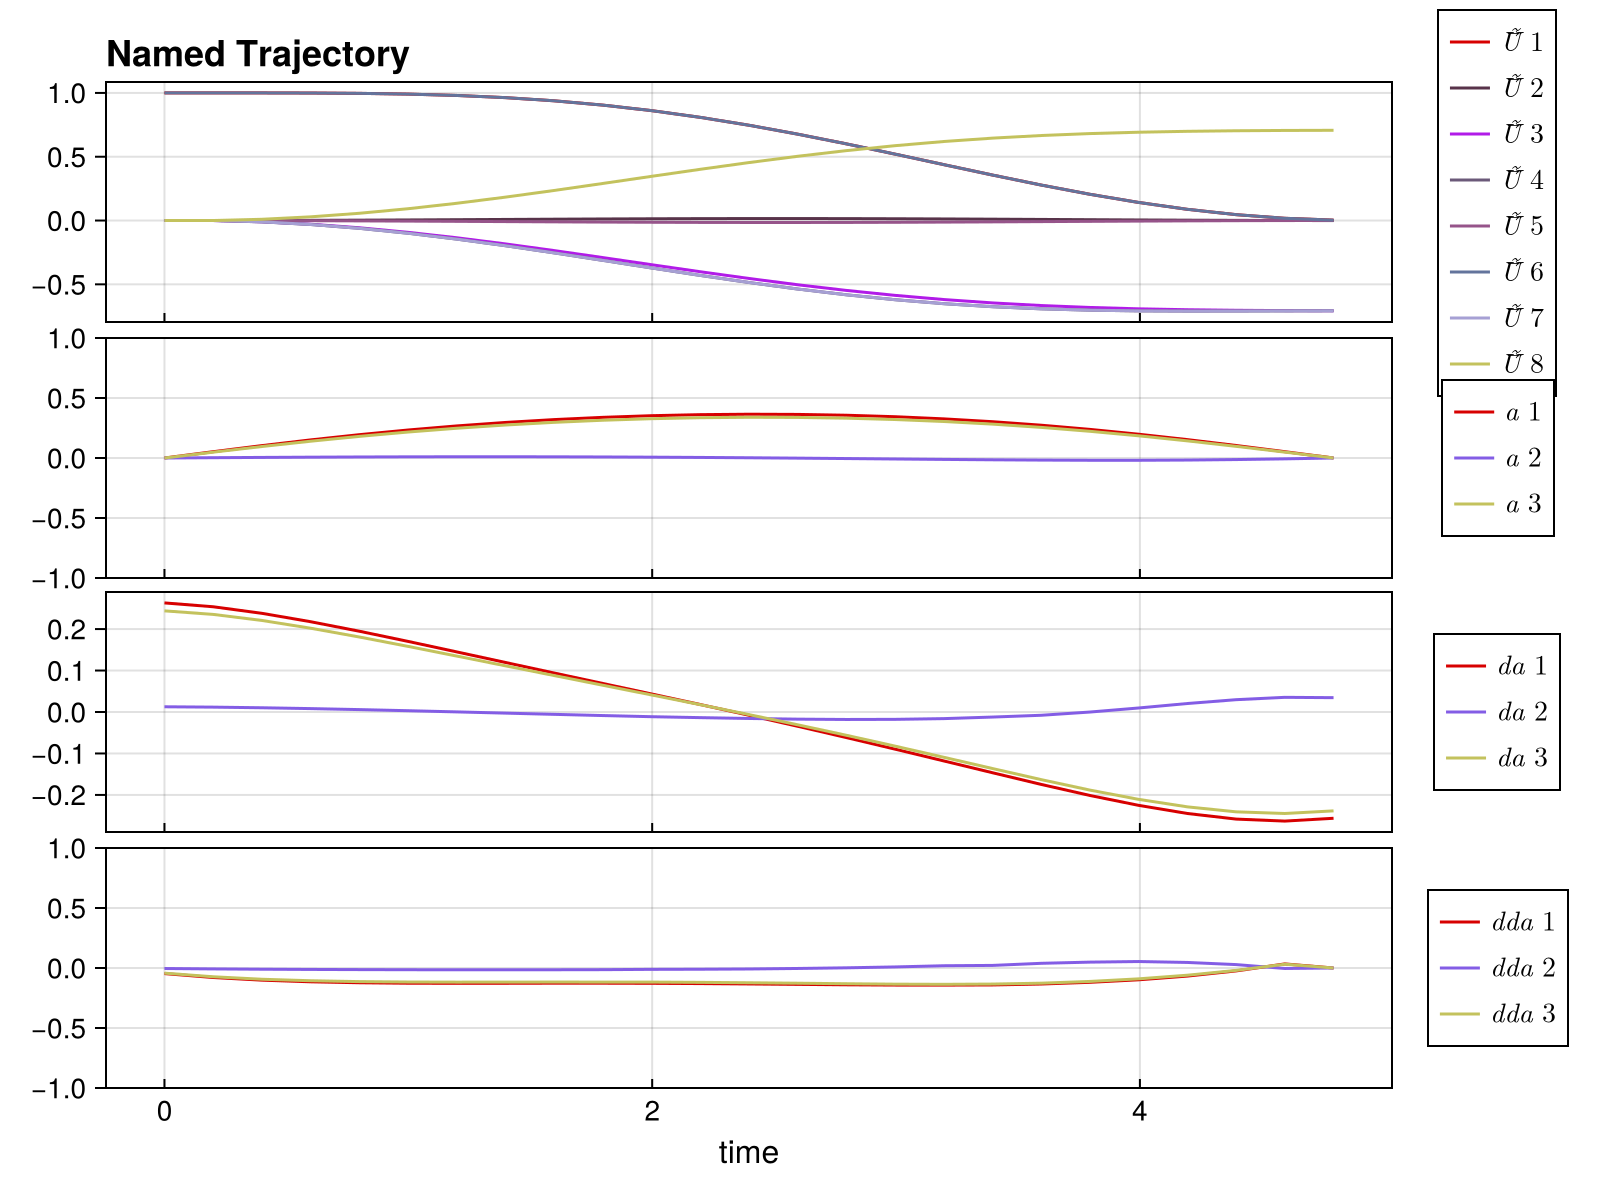

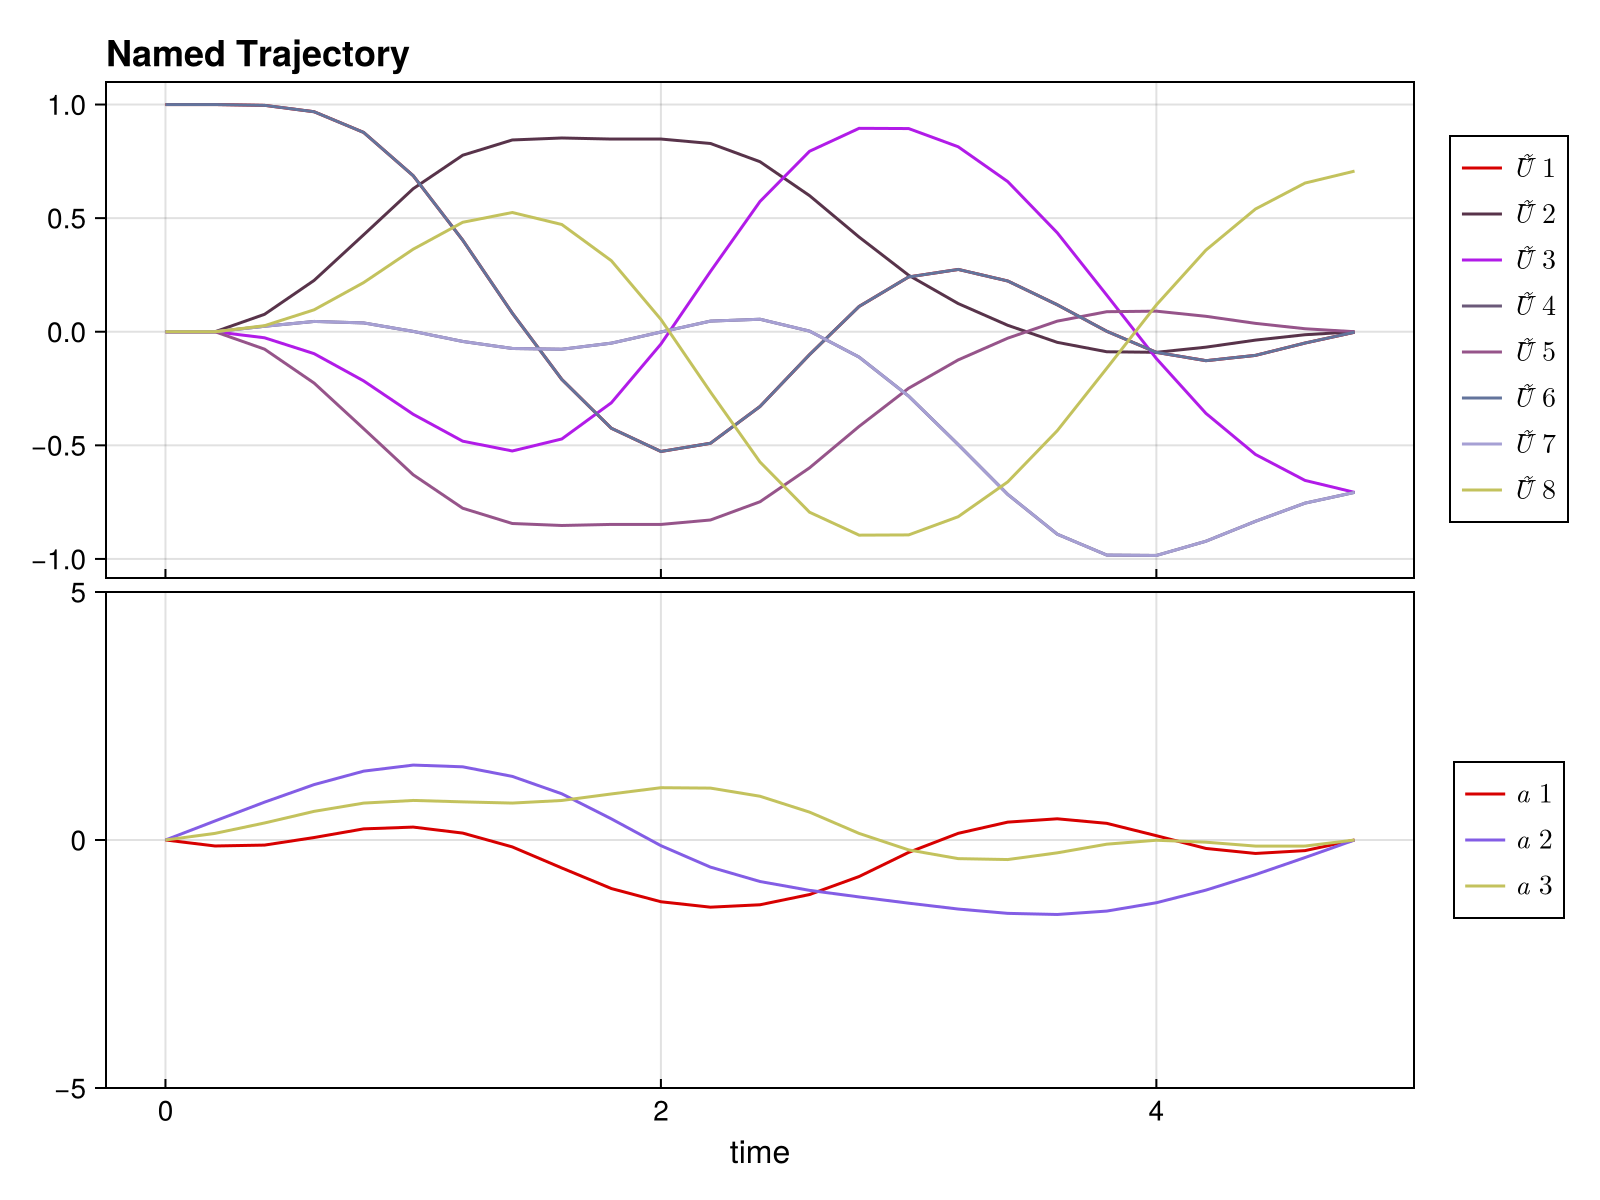

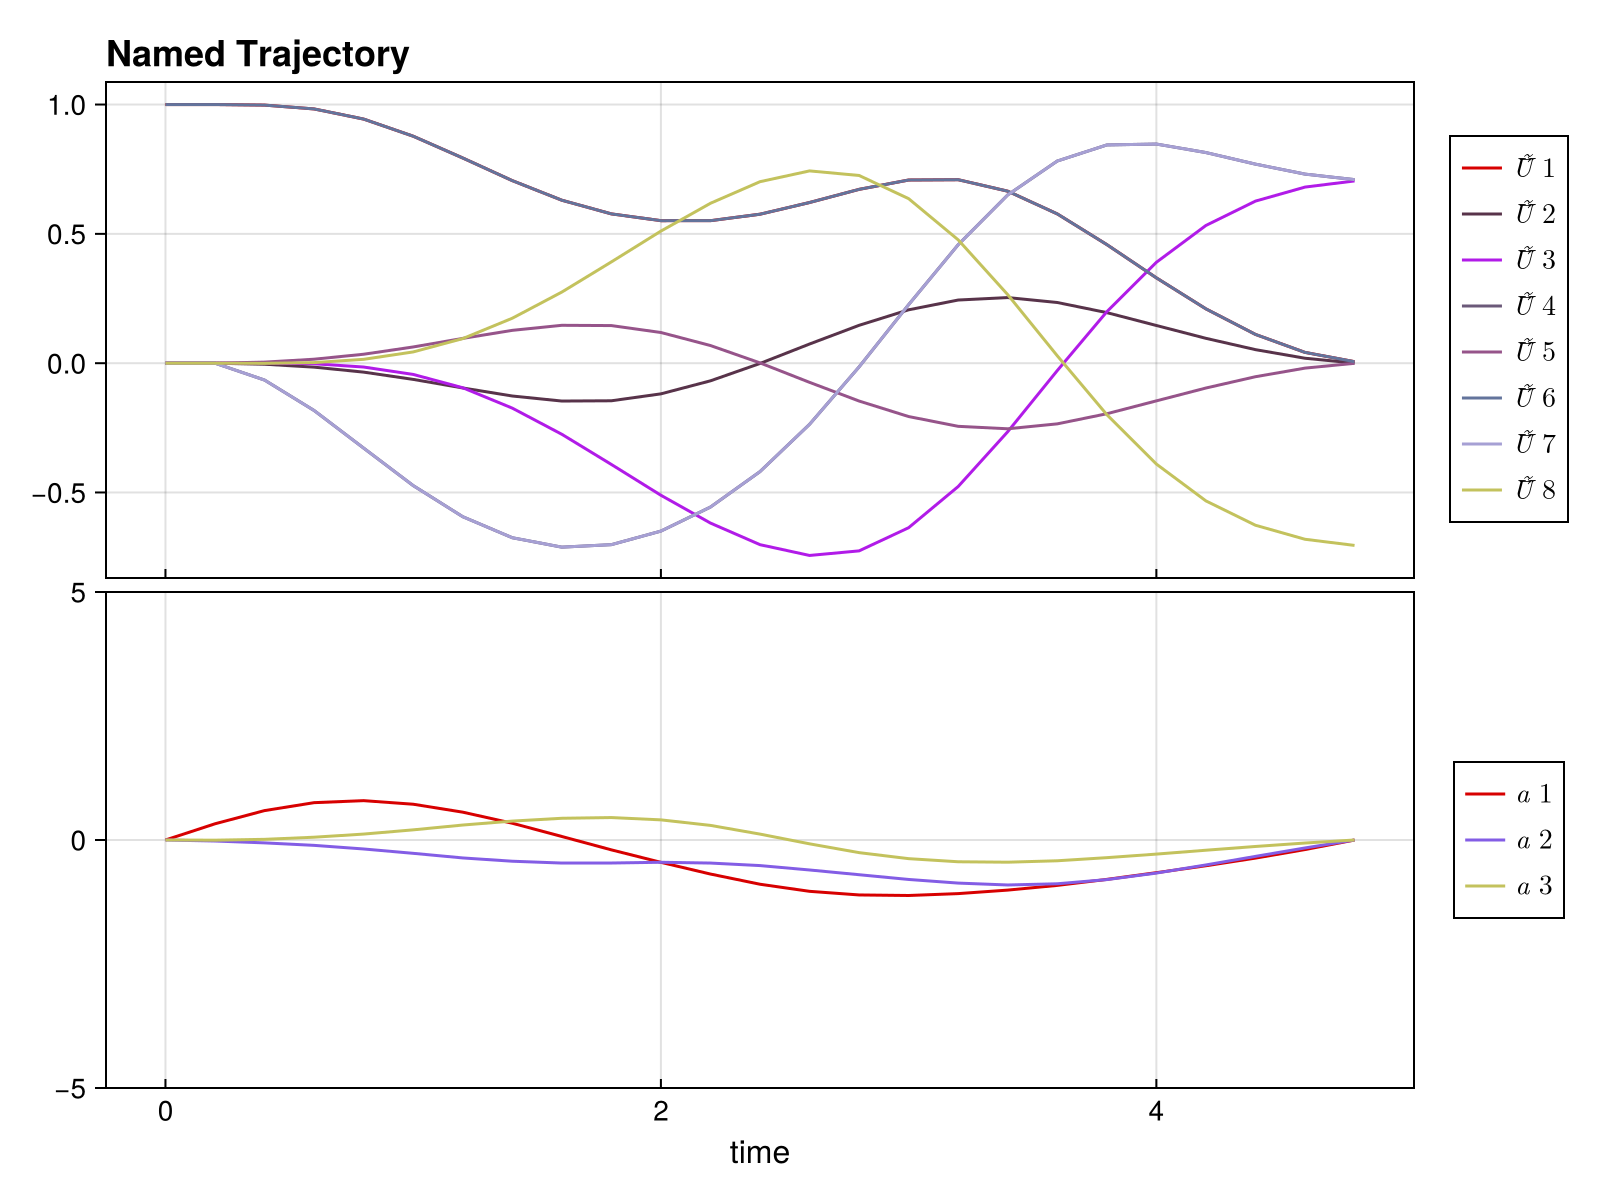

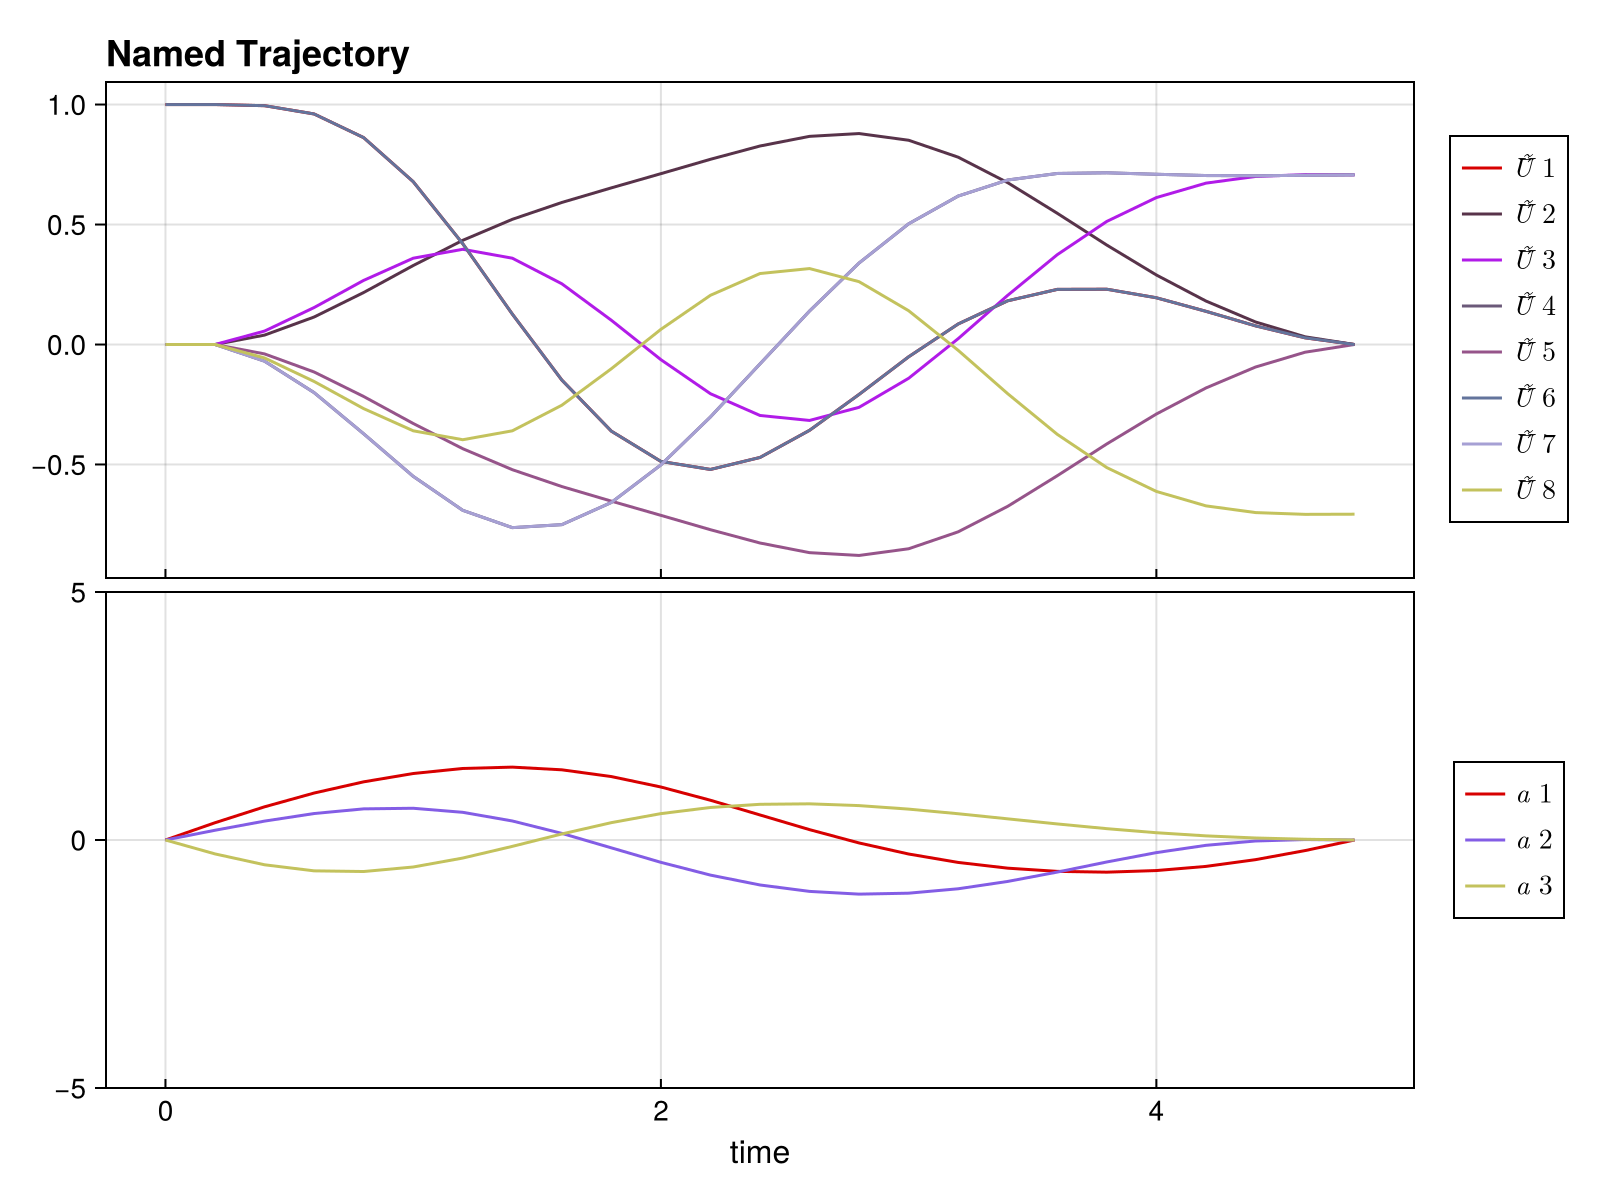

CairoMakie.Screen{IMAGE}


In [70]:
display(CairoMakie.plot(def.trajectory, [:Ũ⃗, :a, :da, :dda]))
display(CairoMakie.plot(var_prob.trajectory, [:Ũ⃗, :a]))
display(CairoMakie.plot(tog_prob.trajectory, [:Ũ⃗, :a]))
display(CairoMakie.plot(ftog_prob.trajectory, [:Ũ⃗, :a]))

In [27]:
var_prob.trajectory.Δt[1], var_prob.trajectory.Δt[end ÷ 2]

(0.2, 0.2)

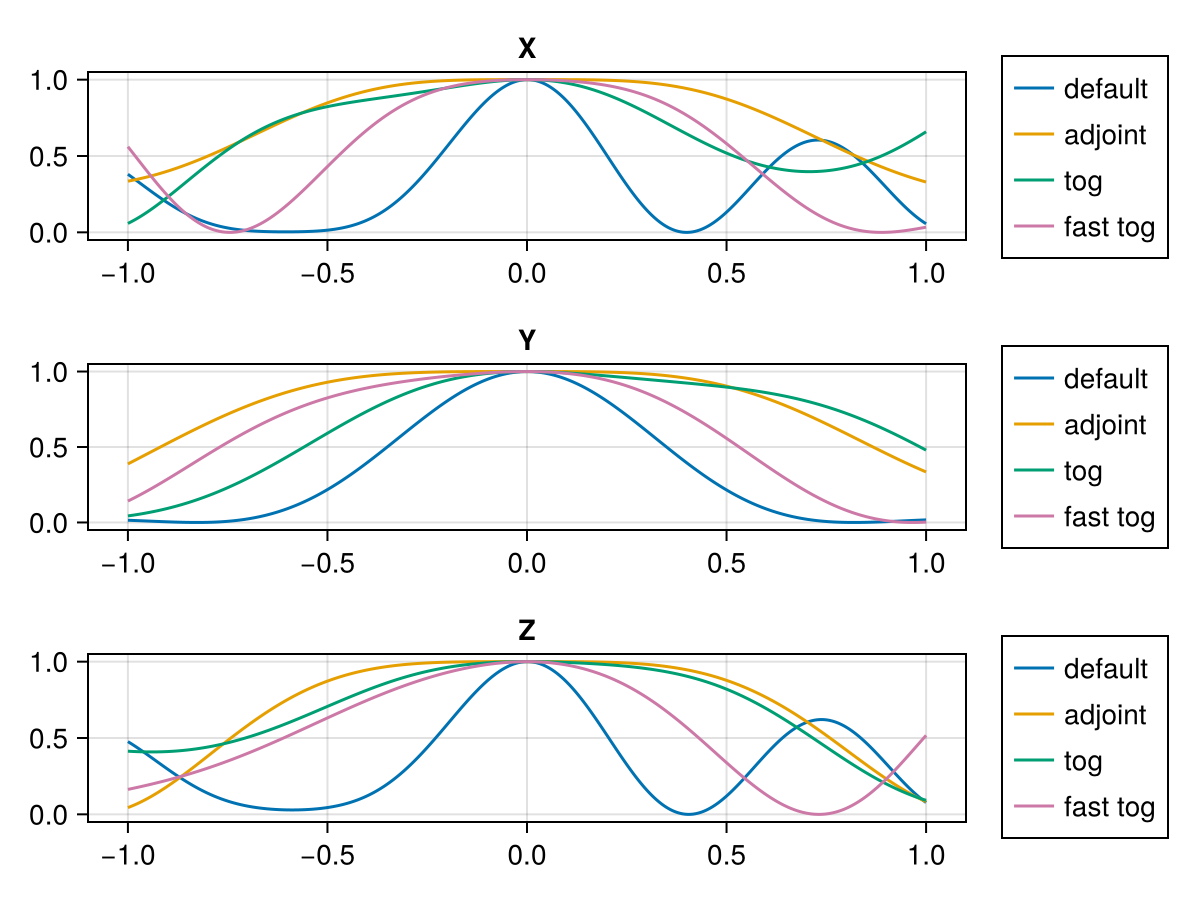

In [91]:
H_drive_add = H_drive

f = Figure()
axX = Axis(f[1, 1], title = "X")
axY = Axis(f[2, 1], title = "Y")
axZ = Axis(f[3, 1], title = "Z")

colors = Makie.wong_colors()
εs = -1:0.001:1

basis = [PAULIS.X, PAULIS.Y, PAULIS.Z]

axes_paulis = [
    (axX, PAULIS.X),
    (axY, PAULIS.Y),
    (axZ, PAULIS.Z),
]

problems = [
    (def,        "default"),
    (var_prob, "adjoint"),
    (tog_prob,   "tog"),
    (ftog_prob, "fast tog"),
]

# Helper to compute the curve once per (problem, Pauli)
fidelity_curve(prob, pauli) = [unitary_rollout_fidelity(prob.trajectory, QuantumSystem(ε * pauli, basis)) for ε in εs]

# Plot everything with two compact loops
for (ax, pauli) in axes_paulis
    for (i, (prob, label)) in enumerate(problems)
        ys = fidelity_curve(prob, pauli)
        lines!(ax, εs, ys; label = label, color = colors[i], linestyle = :solid)
    end
end

Legend(f[1, 2], axX, position = :lb)
Legend(f[2, 2], axY, position = :lb)
Legend(f[3, 2], axZ, position = :lb)

f


# Verify first-order robustness with space curve approach

In [29]:
var_prob.trajectory
ftog_prob.trajectory
tog_prob.trajectory

T = 25, (Ũ⃗ = 1:8, a = 9:11, da = 12:14, dda = 15:17, → Δt = 18:18)

In [72]:
using NamedTrajectories

var_traj = var_prob.trajectory
default_traj = def.trajectory
ftog_traj = ftog_prob.trajectory
tog_traj = tog_prob.trajectory

function SpaceCurve(traj::NamedTrajectory, U_goal::AbstractMatrix{<:Number}, H_err::AbstractMatrix{<:Number})
    T = traj.T
    first_order_terms = Vector{Matrix{ComplexF64}}(undef, T)
    first_order_integral = zeros(ComplexF64, size(U_goal))

    for i in 1:T
        U = iso_vec_to_operator(traj.Ũ⃗[:, i])
        first_order_integral += U' * Hₑ * U
        first_order_terms[i] = first_order_integral
    end
    space_curve = [[real(tr(PAULIS.X * first_order_terms[t])),
                    real(tr(PAULIS.Y * first_order_terms[t])),
                    real(tr(PAULIS.Z * first_order_terms[t]))] for t in 1:T] 
    return space_curve
end

SpaceCurve (generic function with 1 method)

In [31]:
Hₑ = PAULIS.X

2×2 Matrix{ComplexF64}:
 0.0+0.0im  1.0+0.0im
 1.0+0.0im  0.0+0.0im

In [73]:
var_curve = SpaceCurve(var_traj, U_goal, Hₑ)
ftog_curve = SpaceCurve(ftog_traj, U_goal, Hₑ)
tog_curve = SpaceCurve(tog_traj, U_goal, Hₑ)
default_curve = SpaceCurve(default_traj, U_goal, Hₑ)

25-element Vector{Vector{Float64}}:
 [0.0, 0.0, 2.0]
 [-7.047603593744822e-30, -4.429538723733534e-28, 4.0]
 [-0.0015983892787776771, 0.04200685744821084, 5.999558168581288]
 [-0.003886090336429069, 0.16652242334395492, 7.995677064019048]
 [-0.0013430932417087264, 0.4110052747929515, 9.980676229806189]
 [0.017587417401997416, 0.8079236687536815, 11.940803135405197]
 [0.0710544651127623, 1.382332604513425, 13.855795513740496]
 [0.18334728943502754, 2.1491815683224353, 15.699523626048286]
 [0.3834018872406593, 3.110798398748223, 17.441726824380716]
 [0.7023712962407394, 4.255128464782367, 19.050691917977794]
 ⋮
 [7.950513074917582, 13.860700030367012, 25.057863800448466]
 [9.679842693714983, 14.850089895352713, 25.232724460747683]
 [11.51453461423343, 15.641882955992205, 25.316593650021858]
 [13.42387864820706, 16.23672040209862, 25.34219648026981]
 [15.380889990989175, 16.64925261208765, 25.337367072387508]
 [17.36439200813155, 16.905414752828236, 25.322617647309436]
 [19.35990978870139

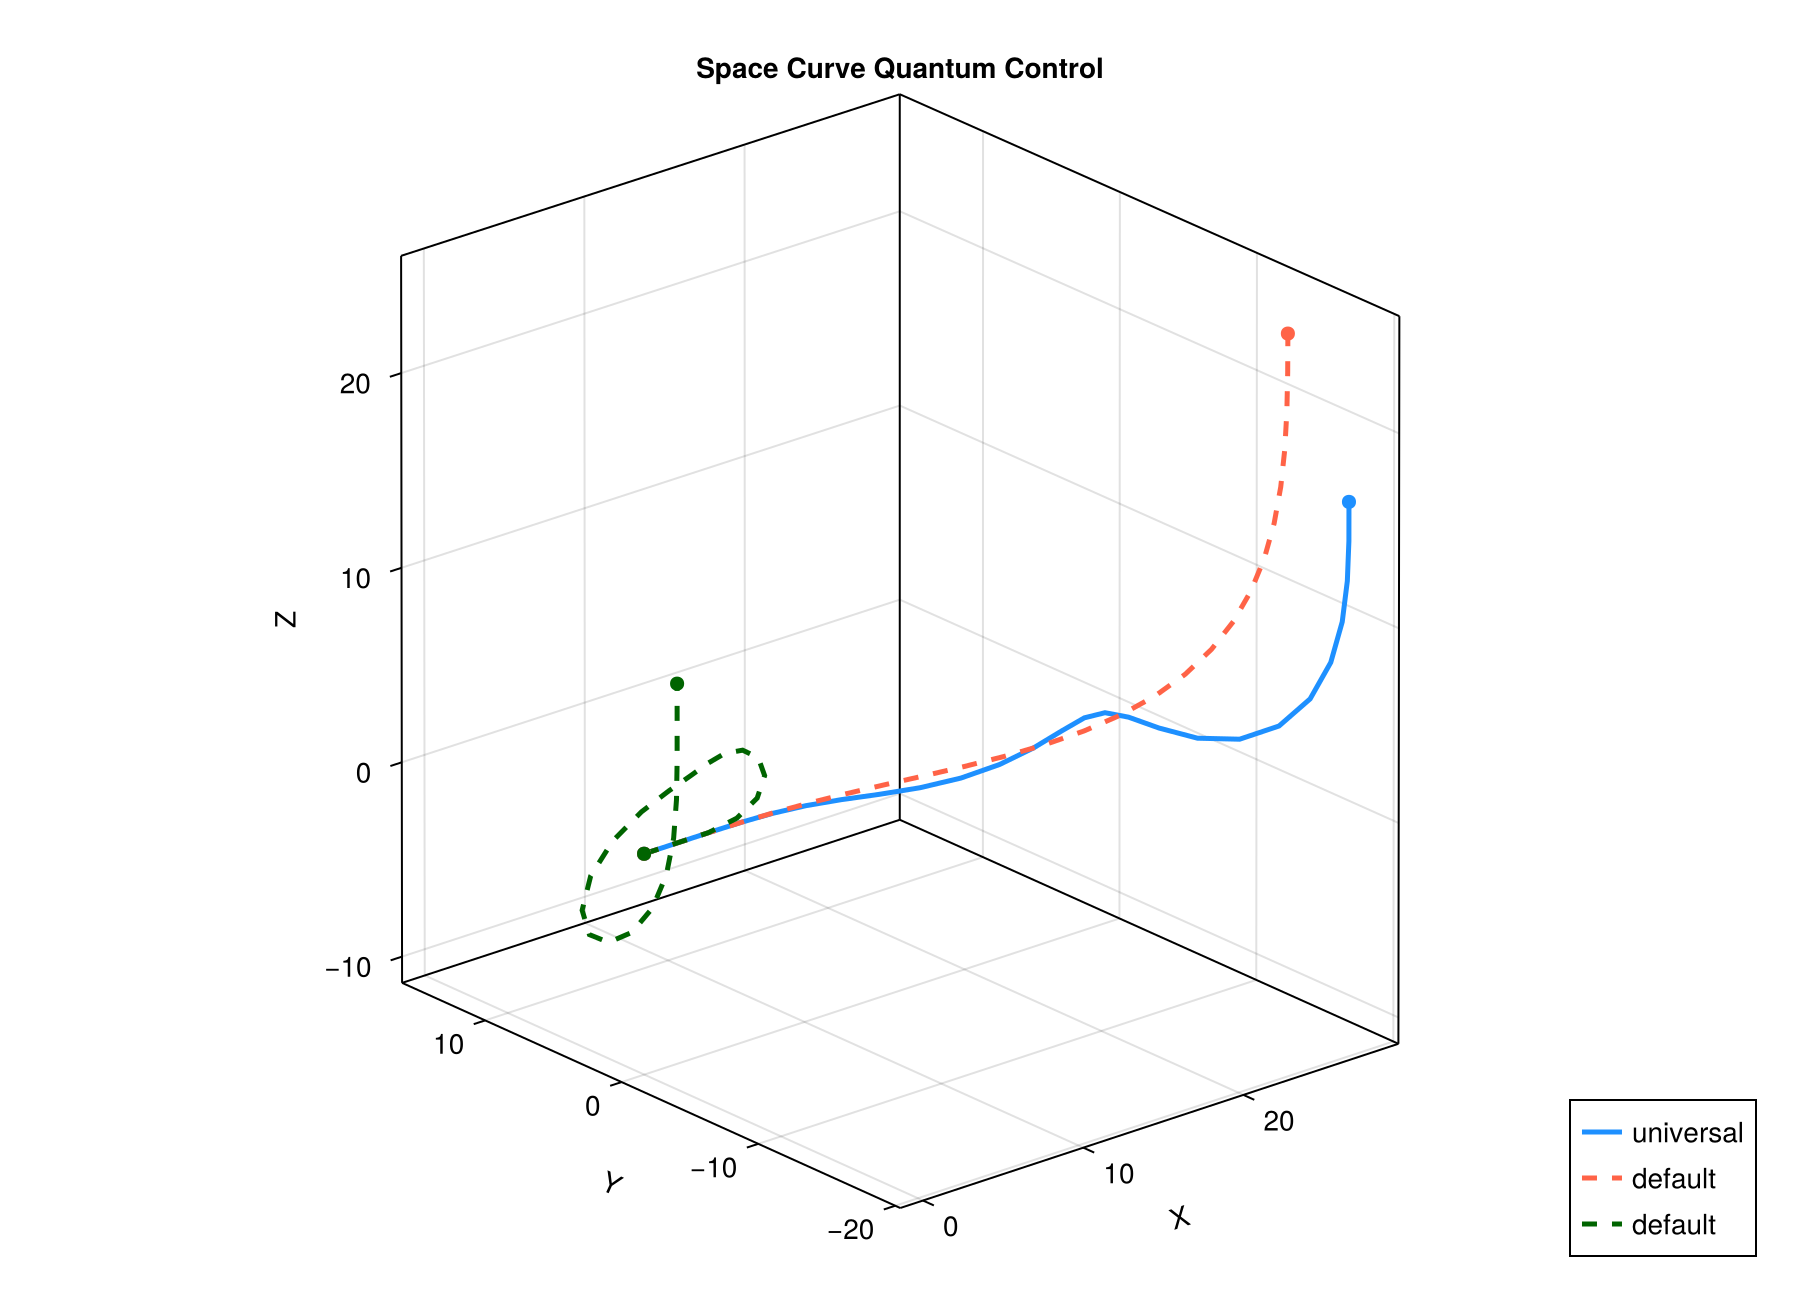

CairoMakie.Screen{IMAGE}


In [74]:
using CairoMakie
const CM = CairoMakie

function to_xyz(curve)
    if curve isa AbstractMatrix
        M = Float64.(real.(curve))
        if size(M, 2) == 3
            x, y, z = M[:, 1], M[:, 2], M[:, 3]
        elseif size(M, 1) == 3
            x, y, z = M[1, :], M[2, :], M[3, :]
        else
            error("Matrix curve must be T×3 or 3×T, got $(size(M))")
        end
    else
        x = Float64.(real.(getindex.(curve, 1)))
        y = Float64.(real.(getindex.(curve, 2)))
        z = Float64.(real.(getindex.(curve, 3)))
    end
    mask = isfinite.(x) .& isfinite.(y) .& isfinite.(z)
    return x[mask], y[mask], z[mask]
end

Hₑ = PAULIS.X

ftog_curve     = SpaceCurve(ftog_traj, U_goal, Hₑ)
tog_curve     = SpaceCurve(tog_traj, U_goal, Hₑ)
default_curve = SpaceCurve(default_traj, U_goal, Hₑ)

x3, y3, z3 = to_xyz(ftog_curve)
x1, y1, z1 = to_xyz(tog_curve)
x2, y2, z2 = to_xyz(default_curve)

pushfirst!(x1, 0.0)
pushfirst!(y1, 0.0)
pushfirst!(z1, 0.0)
pushfirst!(x2, 0.0)
pushfirst!(y2, 0.0)
pushfirst!(z2, 0.0)
pushfirst!(x3, 0.0)
pushfirst!(y3, 0.0)
pushfirst!(z3, 0.0)

f  = CM.Figure(size = (900, 650))
ax = CM.Axis3(f[1, 1];
    xlabel = "X", ylabel = "Y", zlabel = "Z",
    title = "Space Curve Quantum Control", aspect = :data
)

CM.lines!(ax, x1, y1, z1; linewidth = 2.5, color = :dodgerblue, label = "universal")
CM.lines!(ax, x2, y2, z2; linewidth = 2.5, linestyle = :dash, color = :tomato, label = "default")
CM.lines!(ax, x3, y3, z3; linewidth = 2.5, linestyle = :dash, color = :darkgreen, label = "default")

CM.scatter!(ax, [x1[1]],  [y1[1]],  [z1[1]];  markersize = 10, color = :dodgerblue)
CM.scatter!(ax, [x1[end]],[y1[end]],[z1[end]]; markersize = 10, color = :dodgerblue)
CM.scatter!(ax, [x2[1]],  [y2[1]],  [z2[1]];  markersize = 10, color = :tomato)
CM.scatter!(ax, [x2[end]],[y2[end]],[z2[end]]; markersize = 10, color = :tomato)
CM.scatter!(ax, [x3[1]],  [y3[1]],  [z3[1]];  markersize = 10, color = :darkgreen)
CM.scatter!(ax, [x3[end]],[y3[end]],[z3[end]]; markersize = 10, color = :darkgreen)

CM.axislegend(ax; position = :rb)

display(f)

     

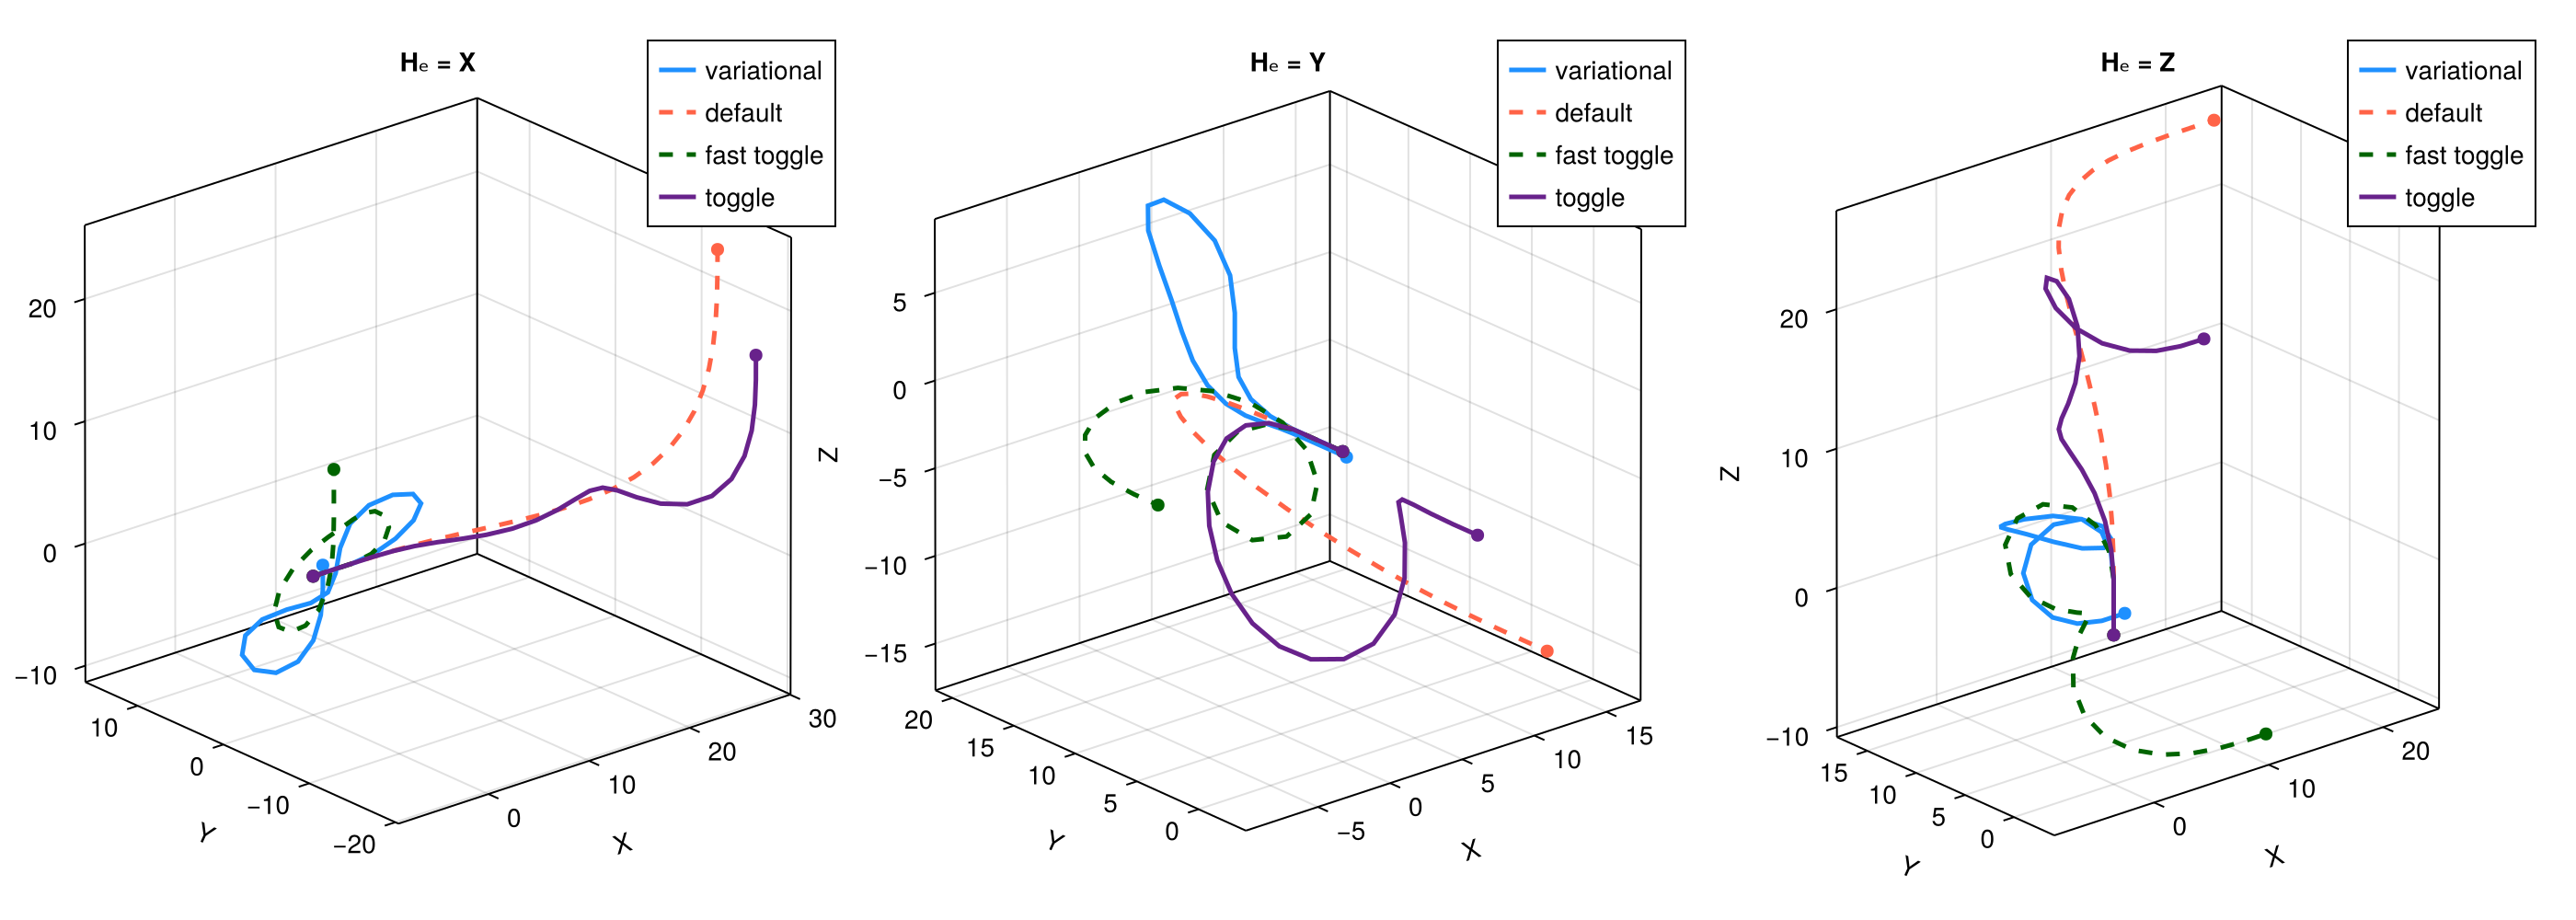

CairoMakie.Screen{IMAGE}


In [75]:
using CairoMakie
const CM = CairoMakie

# --- helpers ---------------------------------------------------------------

# Prepend the origin to each coordinate vector
prepend_origin!(xs...) = (foreach(v -> pushfirst!(v, 0.0), xs); nothing)

# Define CURVE_SPECS once, then mutate it on reruns to avoid the const redefinition warning
if !@isdefined CURVE_SPECS
    const CURVE_SPECS = NamedTuple{(:name,:traj,:linecolor,:linestyle,:startcolor,:endcolor)}[]
end
empty!(CURVE_SPECS)
append!(CURVE_SPECS, [
    (name = "variational",       traj = () -> var_traj,    linecolor = :dodgerblue,  linestyle = :solid, startcolor = :dodgerblue,  endcolor = :dodgerblue),
    (name = "default",         traj = () -> default_traj,linecolor = :tomato,      linestyle = :dash,  startcolor = :tomato,      endcolor = :tomato),
    (name = "fast toggle",  traj = () -> ftog_traj,  linecolor = :darkgreen, linestyle = :dash,  startcolor = :darkgreen, endcolor = :darkgreen),
    (name = "toggle", traj = () -> tog_traj,  linecolor = :darkorchid4,      linestyle = :solid,  startcolor = :darkorchid4,      endcolor = :darkorchid4),
])

# Build SpaceCurve objects for a given Hₑ (also set the global Hₑ used elsewhere)
function curves_for(Hₑ_sym)
    global Hₑ = Hₑ_sym  # required because SpaceCurve (or other code) reads global Hₑ
    return [
        (label = spec.name,
         curve = SpaceCurve(spec.traj(), U_goal, Hₑ_sym),
         linecolor = spec.linecolor,
         linestyle = spec.linestyle,
         startcolor = spec.startcolor,
         endcolor   = spec.endcolor)
        for spec in CURVE_SPECS
    ]
end

# --- plotting --------------------------------------------------------------

function plot_pair!(pos, Hₑ_sym, ttl)
    ax = CM.Axis3(pos; xlabel = "X", ylabel = "Y", zlabel = "Z", title = ttl, aspect = :data)

    for spec in curves_for(Hₑ_sym)
        x, y, z = to_xyz(spec.curve)
        prepend_origin!(x, y, z)

        CM.lines!(ax, x, y, z; linewidth = 2.5, color = spec.linecolor, linestyle = spec.linestyle, label = spec.label)
        CM.scatter!(ax, [first(x)], [first(y)], [first(z)]; markersize = 10, color = spec.startcolor)
        CM.scatter!(ax, [last(x)],  [last(y)],  [last(z)];  markersize = 10, color = spec.endcolor)
    end

    CM.axislegend(ax; position = :rt)
    return ax
end

# --- figure ---------------------------------------------------------------

f = CM.Figure(size = (1400, 500))
for (i, (Hₑ, tag)) in enumerate(((PAULIS.X, "X"), (PAULIS.Y, "Y"), (PAULIS.Z, "Z")))
    plot_pair!(f[1, i], Hₑ, "Hₑ = $tag")
end
display(f)


In [62]:
ket_0 = [1.0,0.0]

rho_0 = ket_0 * ket_0'

expect_val_x = [real(tr(PAULIS.X * iso_vec_to_operator(var_traj.Ũ⃗[:, t]) * rho_0 * iso_vec_to_operator(var_traj.Ũ⃗[:, t])')) for t in 1:var_traj.T]
expect_val_y = [real(tr(PAULIS.Y * iso_vec_to_operator(var_traj.Ũ⃗[:, t]) * rho_0 * iso_vec_to_operator(var_traj.Ũ⃗[:, t])')) for t in 1:var_traj.T]
expect_val_z = [real(tr(PAULIS.Z * iso_vec_to_operator(var_traj.Ũ⃗[:, t]) * rho_0 * iso_vec_to_operator(var_traj.Ũ⃗[:, t])')) for t in 1:var_traj.T]
expect_val_x_1 = [real(tr(PAULIS.X * iso_vec_to_operator(default_traj.Ũ⃗[:, t]) * rho_0 * iso_vec_to_operator(default_traj.Ũ⃗[:, t])')) for t in 1:default_traj.T]
expect_val_y_1 = [real(tr(PAULIS.Y * iso_vec_to_operator(default_traj.Ũ⃗[:, t]) * rho_0 * iso_vec_to_operator(default_traj.Ũ⃗[:, t])')) for t in 1:default_traj.T]
expect_val_z_1 = [real(tr(PAULIS.Z * iso_vec_to_operator(default_traj.Ũ⃗[:, t]) * rho_0 * iso_vec_to_operator(default_traj.Ũ⃗[:, t])')) for t in 1:default_traj.T]

     

25-element Vector{Float64}:
  1.0
  1.0
  0.9997790842906435
  0.9980594477188809
  0.9924995828935699
  0.9800634527995049
  0.9574961891676493
  0.921864056153895
  0.8711015991662131
  0.8044825467985391
  ⋮
  0.15022257272750206
  0.08743033014960949
  0.04193459463708832
  0.012801415123977478
 -0.0024147039411472337
 -0.007374712539034045
 -0.006214147134903258
 -0.002860424578197851
 -0.0003493752291605645

┌ Warning: Found `resolution` in the theme when creating a `Scene`. The `resolution` keyword for `Scene`s and `Figure`s has been deprecated. Use `Figure(; size = ...` or `Scene(; size = ...)` instead, which better reflects that this is a unitless size and not a pixel resolution. The key could also come from `set_theme!` calls or related theming functions.
└ @ Makie /Users/samafine1/.julia/packages/Makie/FUAHr/src/scenes.jl:238
┌ Warning: `shading = true` is not valid. Use `Makie.automatic`, `NoShading`, `FastShading` or `MultiLightShading`. Defaulting to `MakieCore.Automatic()`.
└ @ Makie /Users/samafine1/.julia/packages/Makie/FUAHr/src/lighting.jl:243


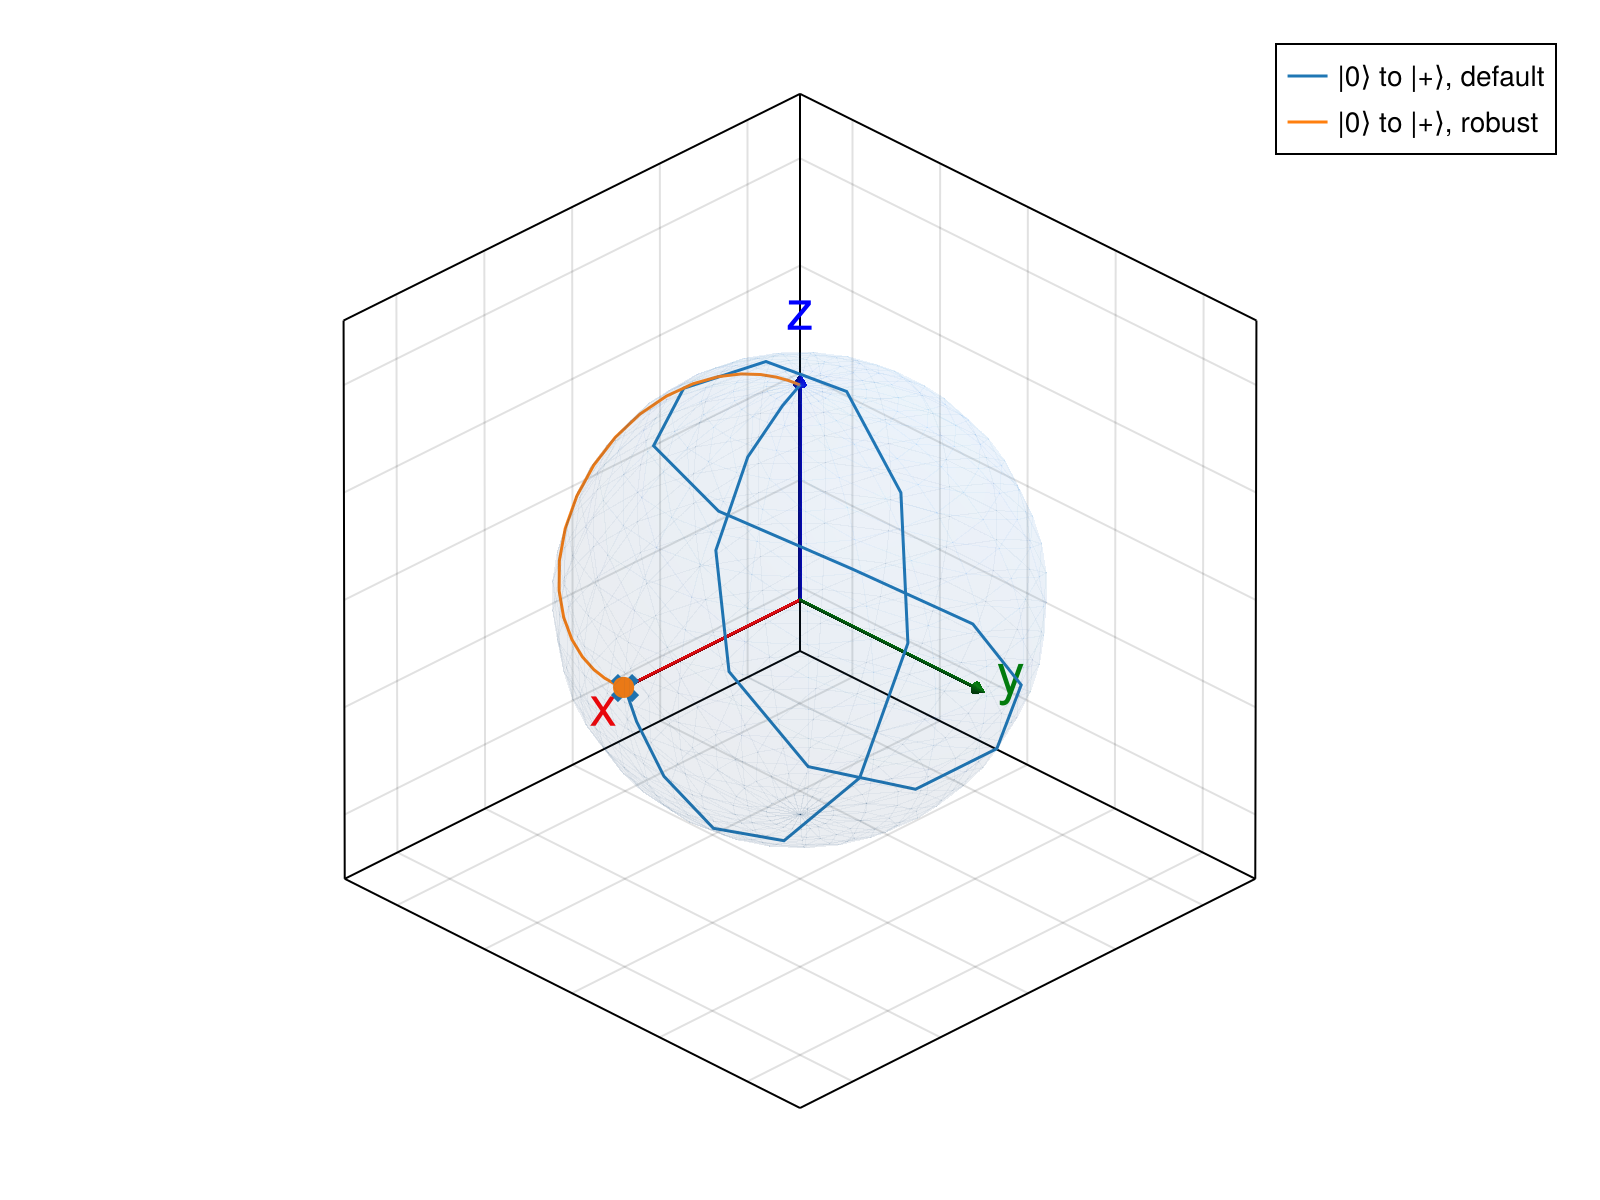

In [76]:
using CairoMakie
using GeometryBasics

f  = CairoMakie.Figure(resolution = (800, 600))
ax = CairoMakie.Axis3(f[1, 1];
    aspect = :equal
)

palette = to_colormap(:tab10)
styles  = (:solid, :dash, :dot, :dashdot)

origins = [Point3f(0,0,0), Point3f(0,0,0), Point3f(0,0,0)]
dirs    = [Vec3f(1.0,0,0), Vec3f(0,1.0,0), Vec3f(0,0,1.0)]

CairoMakie.arrows!(ax, origins, dirs;
    color = [:red, :green, :blue],
    arrowsize = 0.05,
    linewidth = 0.01
)

CairoMakie.text!(ax, "x", position = Point3f(1.2, 0, 0), align = (:left, :center),  color = :red,   fontsize = 28)
CairoMakie.text!(ax, "y", position = Point3f(0, 1.2, 0), align = (:center, :bottom), color = :green, fontsize = 28)
CairoMakie.text!(ax, "z", position = Point3f(0, 0, 1.2), align = (:center, :bottom), color = :blue,  fontsize = 28)

CairoMakie.lines!(ax, real.(expect_val_x), real.(expect_val_y), real.(expect_val_z);
    color     = palette[1],
    linestyle = styles[1],
    label     = "|0⟩ to |+⟩, default",
    linewidth = 1.5
)

CairoMakie.lines!(ax, real.(expect_val_x_1), real.(expect_val_y_1), real.(expect_val_z_1);
    color     = palette[2],
    linestyle = styles[1],
    label     = "|0⟩ to |+⟩, robust",
    linewidth = 1.5
)

CairoMakie.scatter!(ax, [real(expect_val_x[end])], [real(expect_val_y[end])], [real(expect_val_z[end])];
    color = palette[1], markersize = 20, marker = :xcross)

CairoMakie.scatter!(ax, [real(expect_val_x_1[end])], [real(expect_val_y_1[end])], [real(expect_val_z_1[end])];
    color = palette[2], markersize = 15, marker = :circle)

CairoMakie.mesh!(ax, Sphere(Point3f(0,0,0), 1f0);
    color = (0.2, 0.6, 1.0, 0.05),
    transparency = true,
    shading = true
)

CairoMakie.xlims!(ax, -1.3, 1.3)
CairoMakie.ylims!(ax, -1.3, 1.3)
CairoMakie.zlims!(ax, -1.3, 1.3)

ax.azimuth[]   =  π/4
ax.elevation[] =  π/6

CairoMakie.axislegend(ax; position = :rt)
CairoMakie.hidexdecorations!(ax, grid = false)
CairoMakie.hideydecorations!(ax, grid = false)
CairoMakie.hidezdecorations!(ax, grid = false)

f
     

check variational objective

In [64]:
function var_obj(
    traj::NamedTrajectory, 
    H_drives::Vector{Matrix{ComplexF64}}, 
    H_errors::Vector{Matrix{ComplexF64}}
)
    Δt = traj.Δt[1]
    varsys = VariationalQuantumSystem(H_drives, H_errors)
    Ũ⃗, ∂Ũ⃗ = variational_unitary_rollout(traj, varsys)

    U = iso_vec_to_operator(Ũ⃗[:, end])
    # First error term
    ∂U = iso_vec_to_operator(∂Ũ⃗[1][:, end])

    d = size(U, 1)
    return abs(tr((U'*∂U)'*(U'*∂U))) / (T * Δt)^2 / d
end

var_obj (generic function with 1 method)

In [87]:
∂ₑH = [PAULIS.X, PAULIS.Y, PAULIS.Z]
H_drives = [PAULIS.X, PAULIS.Y, PAULIS.Z]
error_ops = [PAULIS.X, PAULIS.Y, PAULIS.Z]

J_var = var_obj(def.trajectory, H_drives, error_ops)

0.5830002269746206

In [88]:
J_var = var_obj(ftog_prob.trajectory, H_drives, error_ops)

0.033147379696172694

In [89]:
J_var = var_obj(var_prob.trajectory, H_drives, error_ops)

0.00013396167445707907

In [90]:
J_var = var_obj(tog_prob.trajectory, H_drives, error_ops)

0.0822395994943744